In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from sklearnex.linear_model import LinearRegression


In [4]:
from xgboost import XGBClassifier

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:

# Load the dataset
data = load_breast_cancer()

# Create dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target variable to dataframe
df['target'] = data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)



In [6]:
# Create XGBoost classifier
xgb = XGBClassifier()

# Fit XGBoost classifier
xgb.fit(X_train, y_train)

# Get XGBoost predictions
xgb_preds = xgb.predict(X_test)



/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/data.py:267: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [7]:
# Create linear regression model
lr = LinearRegression()

# Fit linear regression model on X_train and y_train
lr.fit(X_train, y_train)

# Get linear regression predictions
lr_preds = lr.predict(X_test)



In [8]:
# Combine XGBoost and linear regression predictions
hybrid_preds = xgb_preds * lr_preds



In [9]:
# Print accuracy score for hybrid model
accuracy = (hybrid_preds == y_test).sum() / len(y_test)
print('Accuracy of hybrid model: {:.2f}%'.format(accuracy*100))

Accuracy of hybrid model: 35.67%


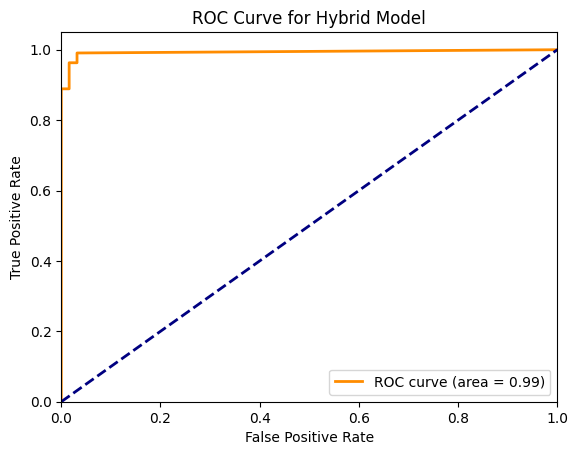

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Get ROC curve for hybrid model
fpr, tpr, _ = roc_curve(y_test, hybrid_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hybrid Model')
plt.legend(loc="lower right")
plt.show()
